In [1]:
import pandas as pd
import numpy as np

In [2]:
#df_ev = pd.read_csv('event.csv')
df_uv = pd.read_csv('user_page_view.csv')

In [3]:
df_pg = pd.read_csv('page_topic.csv')

In [ ]:
df_ev.head()

In [ ]:
df_uv.head()

In [ ]:
df_uv.info()

In [ ]:
df_pg['pageId'].nunique()

In [ ]:
df_uv['pageId'].nunique()

In [ ]:
df_ev['pageId'].nunique()

In [4]:
df_uvg = df_uv.groupby(['userId','pageId']).agg({'timestamp':'count'}).reset_index()

In [4]:
df_evg = df_ev.groupby(['userId','pageId']).agg({'timestamp':'count'}).reset_index()

In [5]:
df_evg.head(10)

,userId,pageId,timestamp
0,8,6906796,1
1,8,9747176,1
2,22,10404661,1
3,30,10506468,1
4,44,104462,3
5,47,10386388,1
6,48,590,1
7,49,9664982,1
8,49,10518463,1
9,51,5501,1


In [ ]:
df_evg.rename(columns={'timestamp': 'click_number'}, inplace=True)
df_evg.sample(10)

In [5]:
df_uvg.rename(columns={'timestamp': 'visit_number'}, inplace=True)
df_uvg.sample(10)

,userId,pageId,visit_number
10503747,638142,1419926,1
21491132,1586985,8307155,1
10138487,614614,7445459,1
29881868,2626811,7516352,1
13948903,881373,9036035,2
18844107,1316466,7380658,1
28634424,2424240,7198665,1
16647889,1129614,8261562,1
17962781,1236049,33667,1
29851210,2621374,1708,1


In [ ]:
df_uvg['visit_number'].max()

In [8]:
df_new = pd.merge(df_evg, df_uvg, how = 'inner', on = ['pageId','userId'])

In [ ]:
df_new.info()

In [ ]:
df_new.sample(10)

In [6]:
df_new_2 = pd.merge(df_uvg, df_pg, how = 'inner', on = 'pageId')
df_new_2.sample(10)

,userId,pageId,visit_number,topicId,confidence
91259416,476119,31574,2,22,0.042292
9274074,2540232,6976548,1,39,0.187680
26961303,284975,7208019,6,45,0.054118
54639236,1821215,7712170,1,12,0.049520
869346,716356,8390990,2,33,0.172340
55472516,1962728,8659428,1,39,0.213381
55980766,242748,9511041,1,23,0.026883
16864473,1906895,8186228,1,37,0.928565
54134166,1546752,8688720,1,35,0.120956
60647361,2535290,7550060,1,4,0.034542


In [10]:
df_new_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99000107 entries, 0 to 99000106
Data columns (total 6 columns):
userId          int64
pageId          int64
visit_number    int64
topicId         int64
confidence      float64
VC              float64
dtypes: float64(2), int64(4)
memory usage: 5.2 GB


In [8]:
df_new_2['VC'] = df_new_2['visit_number'] * df_new_2['confidence']

In [9]:
user_feature = df_new_2.groupby(['userId','topicId'], as_index = True).\
                                        agg({'VC':'sum','visit_number':'sum'})

In [11]:
del(df_new_2)

In [ ]:
user_feature['VC'].var()

In [12]:
user_feature.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 18361114 entries, (8, 0) to (2688642, 47)
Data columns (total 2 columns):
VC              float64
visit_number    int64
dtypes: float64(1), int64(1)
memory usage: 373.7 MB


In [13]:
user_feature.hist(bins=30, figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253F01DC348>,
      dtype=object)

In [ ]:
user_feature['like_point'] = user_feature['VC'] / user_feature['visit_number']

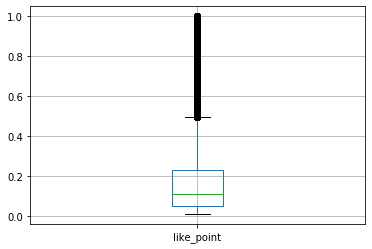

In [16]:
user_feature.boxplot(['like_point'])

In [ ]:
user_feature.info()

In [ ]:
user_feature.to_csv('user_feature.csv')